# Causality Workshop 2025 - PNNL TechFest
## NOCAP introduction and Tutorial 
### August George and Jeremy Zucker

# Introduction: Causality for Bioengineering

* Engineer biological systems with novel capabilities (biofactories, sensors, therapeutics)

* Fill gaps in biological "parts list" and component functions

* Develop better mechanistic models despite messy data

* Leverage emerging experiments and causal analysis to advance the field


# Background: GRNs and Perturb-Seq

* Central dogma: DNA --> RNA --> Protein

* Gene Regulatory Networks (GRNs)
  * Node: gene expression, Edge: interaction

* Perturb-Seq: scRNAseq with CRISPR
  * Millions of cells, thousands of genes/cell
  * Measure RNA levels/cell
  * Perform soft interventions on genes


# NOCAP

* NOCAP: Network Optimization and Causal Analysis of Perturb-seq

* A toolkit to study perturb-seq data and gene regulatory networks (GRN) using causality

* Causal Workflow:
  * Build model
  * Simulate data and calibrate 
  * Causal queries



# Getting Started - Making a Model

* (Linear) Structural Causal Model: $X\rightarrow Y$; $Y = βX + ε$
  * Gene expression of Y, Gene expression of gene X, edge weight β, noise ε
  * Good first order approximation, but has limitations


In [1]:
# load modules for tutorial
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
from IPython.display import display

import nocap

In [2]:
# loading E. coli tyrR subnetwork
tyrR_DAG = nx.read_gml("tyrR_filtered.gml")
tyrR_SCM = nocap.scm.generate_lscm_from_dag(tyrR_DAG)
display(f"Number of nodes in the DAG: {tyrR_DAG.number_of_nodes()}")
display(f"Number of edges in the DAG: {tyrR_DAG.number_of_edges()}")

'Number of nodes in the DAG: 26'

'Number of edges in the DAG: 63'

# Inspecting the Model
* Visualizing the causal graph and model equations

In [3]:
nocap.scm.plot_interactive_lscm_graph(tyrR_SCM)

In [4]:
display(nocap.scm.convert_to_latex(tyrR_SCM))

'$$cra = \\epsilon_{cra}$$\n $$rpoD = \\epsilon_{rpoD}$$\n $$glaR = \\epsilon_{glaR}$$\n $$cpxR = \\beta_{rpoD ->cpxR} rpoD + \\epsilon_{cpxR}$$\n $$fnr = \\beta_{rpoD ->fnr} rpoD + \\epsilon_{fnr}$$\n $$hupB = \\beta_{rpoD ->hupB} rpoD + \\epsilon_{hupB}$$\n $$ihfB = \\beta_{rpoD ->ihfB} rpoD + \\epsilon_{ihfB}$$\n $$lrp = \\beta_{rpoD ->lrp} rpoD + \\epsilon_{lrp}$$\n $$trpR = \\beta_{rpoD ->trpR} rpoD + \\epsilon_{trpR}$$\n $$soxR = \\beta_{fnr ->soxR} fnr + \\beta_{rpoD ->soxR} rpoD + \\epsilon_{soxR}$$\n $$ihfA = \\beta_{ihfB ->ihfA} ihfB + \\epsilon_{ihfA}$$\n $$argR = \\beta_{lrp ->argR} lrp + \\beta_{rpoD ->argR} rpoD + \\epsilon_{argR}$$\n $$nac = \\beta_{fnr ->nac} fnr + \\beta_{lrp ->nac} lrp + \\epsilon_{nac}$$\n $$tyrR = \\beta_{lrp ->tyrR} lrp + \\beta_{rpoD ->tyrR} rpoD + \\epsilon_{tyrR}$$\n $$hupA = \\beta_{nac ->hupA} nac + \\epsilon_{hupA}$$\n $$aroF = \\beta_{nac ->aroF} nac + \\beta_{rpoD ->aroF} rpoD + \\beta_{soxR ->aroF} soxR + \\beta_{tyrR ->aroF} tyrR + \\epsi

$$cra = \epsilon_{cra}$$
 $$rpoD = \epsilon_{rpoD}$$
 $$glaR = \epsilon_{glaR}$$
 $$cpxR = \beta_{rpoD ->cpxR} rpoD + \epsilon_{cpxR}$$
 $$fnr = \beta_{rpoD ->fnr} rpoD + \epsilon_{fnr}$$
 $$hupB = \beta_{rpoD ->hupB} rpoD + \epsilon_{hupB}$$
 $$ihfB = \beta_{rpoD ->ihfB} rpoD + \epsilon_{ihfB}$$
 $$lrp = \beta_{rpoD ->lrp} rpoD + \epsilon_{lrp}$$
 $$trpR = \beta_{rpoD ->trpR} rpoD + \epsilon_{trpR}$$
 $$soxR = \beta_{fnr ->soxR} fnr + \beta_{rpoD ->soxR} rpoD + \epsilon_{soxR}$$
 $$ihfA = \beta_{ihfB ->ihfA} ihfB + \epsilon_{ihfA}$$
 $$argR = \beta_{lrp ->argR} lrp + \beta_{rpoD ->argR} rpoD + \epsilon_{argR}$$
 $$nac = \beta_{fnr ->nac} fnr + \beta_{lrp ->nac} lrp + \epsilon_{nac}$$
 $$tyrR = \beta_{lrp ->tyrR} lrp + \beta_{rpoD ->tyrR} rpoD + \epsilon_{tyrR}$$
 $$hupA = \beta_{nac ->hupA} nac + \epsilon_{hupA}$$
 $$aroF = \beta_{nac ->aroF} nac + \beta_{rpoD ->aroF} rpoD + \beta_{soxR ->aroF} soxR + \beta_{tyrR ->aroF} tyrR + \epsilon_{aroF}$$
 $$aroG = \beta_{cpxR ->aroG} cpxR + \beta_{lrp ->aroG} lrp + \beta_{rpoD ->aroG} rpoD + \beta_{tyrR ->aroG} tyrR + \epsilon_{aroG}$$
 $$aroL = \beta_{rpoD ->aroL} rpoD + \beta_{trpR ->aroL} trpR + \beta_{tyrR ->aroL} tyrR + \epsilon_{aroL}$$
 $$aroM = \beta_{rpoD ->aroM} rpoD + \beta_{trpR ->aroM} trpR + \beta_{tyrR ->aroM} tyrR + \epsilon_{aroM}$$
 $$aroP = argR \beta_{argR ->aroP} + \beta_{cra ->aroP} cra + \beta_{fnr ->aroP} fnr + \beta_{glaR ->aroP} glaR + \beta_{rpoD ->aroP} rpoD + \beta_{tyrR ->aroP} tyrR + \epsilon_{aroP}$$
 $$folA = \beta_{ihfA ->folA} ihfA + \beta_{ihfB ->folA} ihfB + \beta_{rpoD ->folA} rpoD + \beta_{tyrR ->folA} tyrR + \epsilon_{folA}$$
 $$tyrA = \beta_{rpoD ->tyrA} rpoD + \beta_{soxR ->tyrA} soxR + \beta_{tyrR ->tyrA} tyrR + \epsilon_{tyrA}$$
 $$tyrB = \beta_{rpoD ->tyrB} rpoD + \beta_{tyrR ->tyrB} tyrR + \epsilon_{tyrB}$$
 $$yaiA = \beta_{rpoD ->yaiA} rpoD + \beta_{trpR ->yaiA} trpR + \beta_{tyrR ->yaiA} tyrR + \epsilon_{yaiA}$$
 $$mtr = \beta_{hupA ->mtr} hupA + \beta_{hupB ->mtr} hupB + \beta_{ihfA ->mtr} ihfA + \beta_{ihfB ->mtr} ihfB + \beta_{lrp ->mtr} lrp + \beta_{rpoD ->mtr} rpoD + \beta_{trpR ->mtr} trpR + \beta_{tyrR ->mtr} tyrR + \epsilon_{mtr}$$
 $$tyrP = \beta_{hupA ->tyrP} hupA + \beta_{hupB ->tyrP} hupB + \beta_{ihfA ->tyrP} ihfA + \beta_{ihfB ->tyrP} ihfB + \beta_{lrp ->tyrP} lrp + \beta_{rpoD ->tyrP} rpoD + \beta_{tyrR ->tyrP} tyrR + \epsilon_{tyrP}$$

# Model Simulation
* Generating synthetic perturb-seq data

,cra,rpoD,glaR,cpxR,fnr,hupB,ihfB,lrp,trpR,soxR,...,aroG,aroL,aroM,aroP,folA,tyrA,tyrB,yaiA,mtr,tyrP
0,0.000000,0.000000,0.000000,0.348388,0.171906,0.989316,0.000000,0.586691,0.914482,0.000000,...,2.429302,1.330877,0.000000,1.472276,0.656026,0.000000,0.437140,1.244915,4.123398,1.168637
1,0.000000,0.083484,0.000000,1.013208,1.227272,1.087392,0.127682,0.000000,1.487611,0.899923,...,0.000000,0.338958,0.929576,0.522481,0.000000,1.134804,0.908528,1.930812,0.998624,0.000000
2,0.853185,1.042689,1.496813,1.047035,1.078759,1.308929,2.570437,1.236542,1.127784,1.338619,...,3.978813,2.560994,1.196903,4.807969,5.135628,4.836510,1.738733,4.011292,5.763166,4.007338
3,0.000000,0.000000,0.693602,0.000000,1.012539,0.000000,0.161843,0.352640,0.305002,0.000000,...,0.405361,0.699784,0.000000,0.000000,1.113303,0.471023,0.103188,0.000000,2.862228,0.839737
4,0.000000,0.704390,0.000000,1.148734,2.169846,0.305964,2.831395,0.670974,2.411473,1.396891,...,0.979626,1.109893,1.982568,3.011659,4.352022,1.831859,0.723554,3.889977,5.027971,3.044125


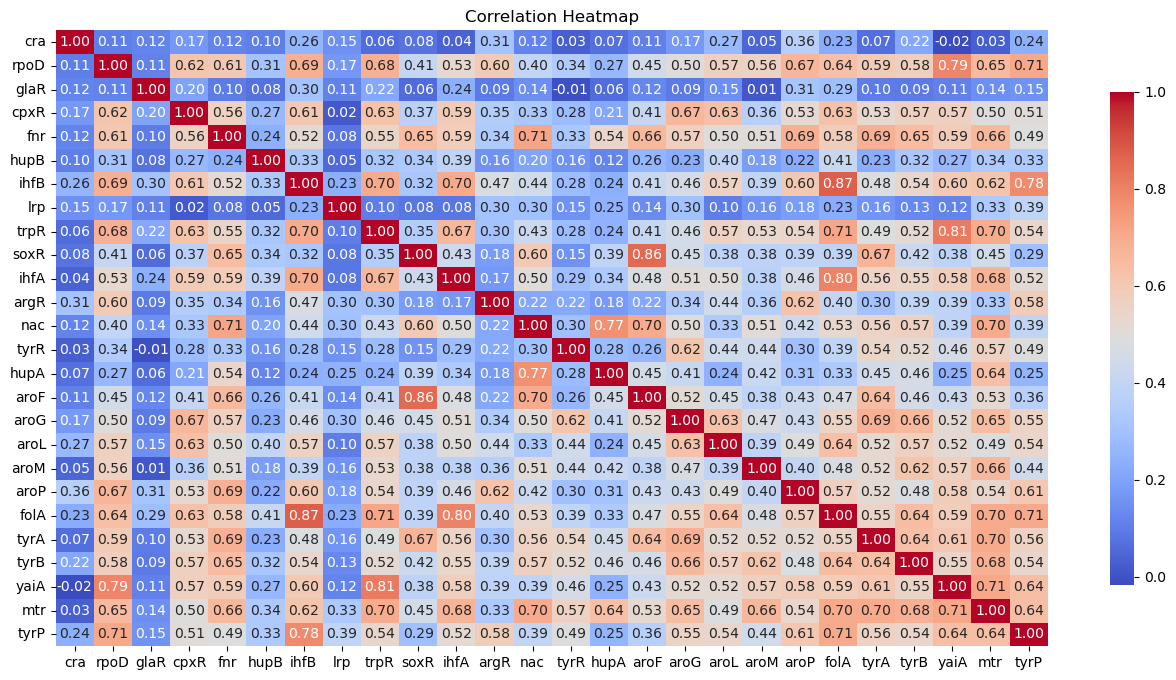

In [5]:
# Simulate data from the model
compiled_lgbn_model = nocap.scm.compile_lgbn_from_lscm(tyrR_SCM)  # Linear Gaussian Bayesian Network
simulated_data = nocap.simulate_data_with_outliers(compiled_lgbn_model, num_samples=1000)
display(simulated_data.head())

# Plot the heatmap
corr_matrix = simulated_data.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap")
plt.show()

# Model Calibration
* Learning model parameters from data
* Conditional probability distributions for each node are learned

In [6]:
# run inverse modeling (parameter estimation)
calibrated_lgbn_model = nocap.scm.fit_model(
    compiled_lgbn_model, simulated_data, backend="pgmpy", method="mle"
)
display(calibrated_lgbn_model.cpds)
simulated_data_after_calibration = nocap.simulate_data_with_outliers(
    calibrated_lgbn_model, num_samples=1000
)

[<LinearGaussianCPD: P(cra) = N(0.419; 0.544) at 0x31b7c25d0,
 <LinearGaussianCPD: P(rpoD) = N(0.434; 0.483) at 0x31b719510,
 <LinearGaussianCPD: P(glaR) = N(0.442; 0.463) at 0x31b7b42d0,
 <LinearGaussianCPD: P(cpxR | rpoD) = N(1.326*rpoD + 0.539; 1.369) at 0x31b1c6dd0,
 <LinearGaussianCPD: P(fnr | rpoD) = N(1.213*rpoD + 0.708; 1.218) at 0x31b22d250,
 <LinearGaussianCPD: P(hupB | rpoD) = N(0.554*rpoD + 0.563; 1.407) at 0x31b215150,
 <LinearGaussianCPD: P(ihfB | rpoD) = N(1.739*rpoD + 0.344; 1.604) at 0x31b710f90,
 <LinearGaussianCPD: P(lrp | rpoD) = N(0.158*rpoD + 0.351; 0.416) at 0x31b762390,
 <LinearGaussianCPD: P(trpR | rpoD) = N(1.485*rpoD + 0.429; 1.214) at 0x31b1f7d10,
 <LinearGaussianCPD: P(soxR | rpoD, fnr) = N(0.034*rpoD + 0.594*fnr + 0.107; 0.961) at 0x31b770f90,
 <LinearGaussianCPD: P(ihfA | ihfB) = N(0.704*ihfB + 0.21; 1.592) at 0x31b737f50,
 <LinearGaussianCPD: P(argR | rpoD, lrp) = N(0.811*rpoD + 0.323*lrp + 0.166; 0.611) at 0x31b75d210,
 <LinearGaussianCPD: P(nac | fnr, 

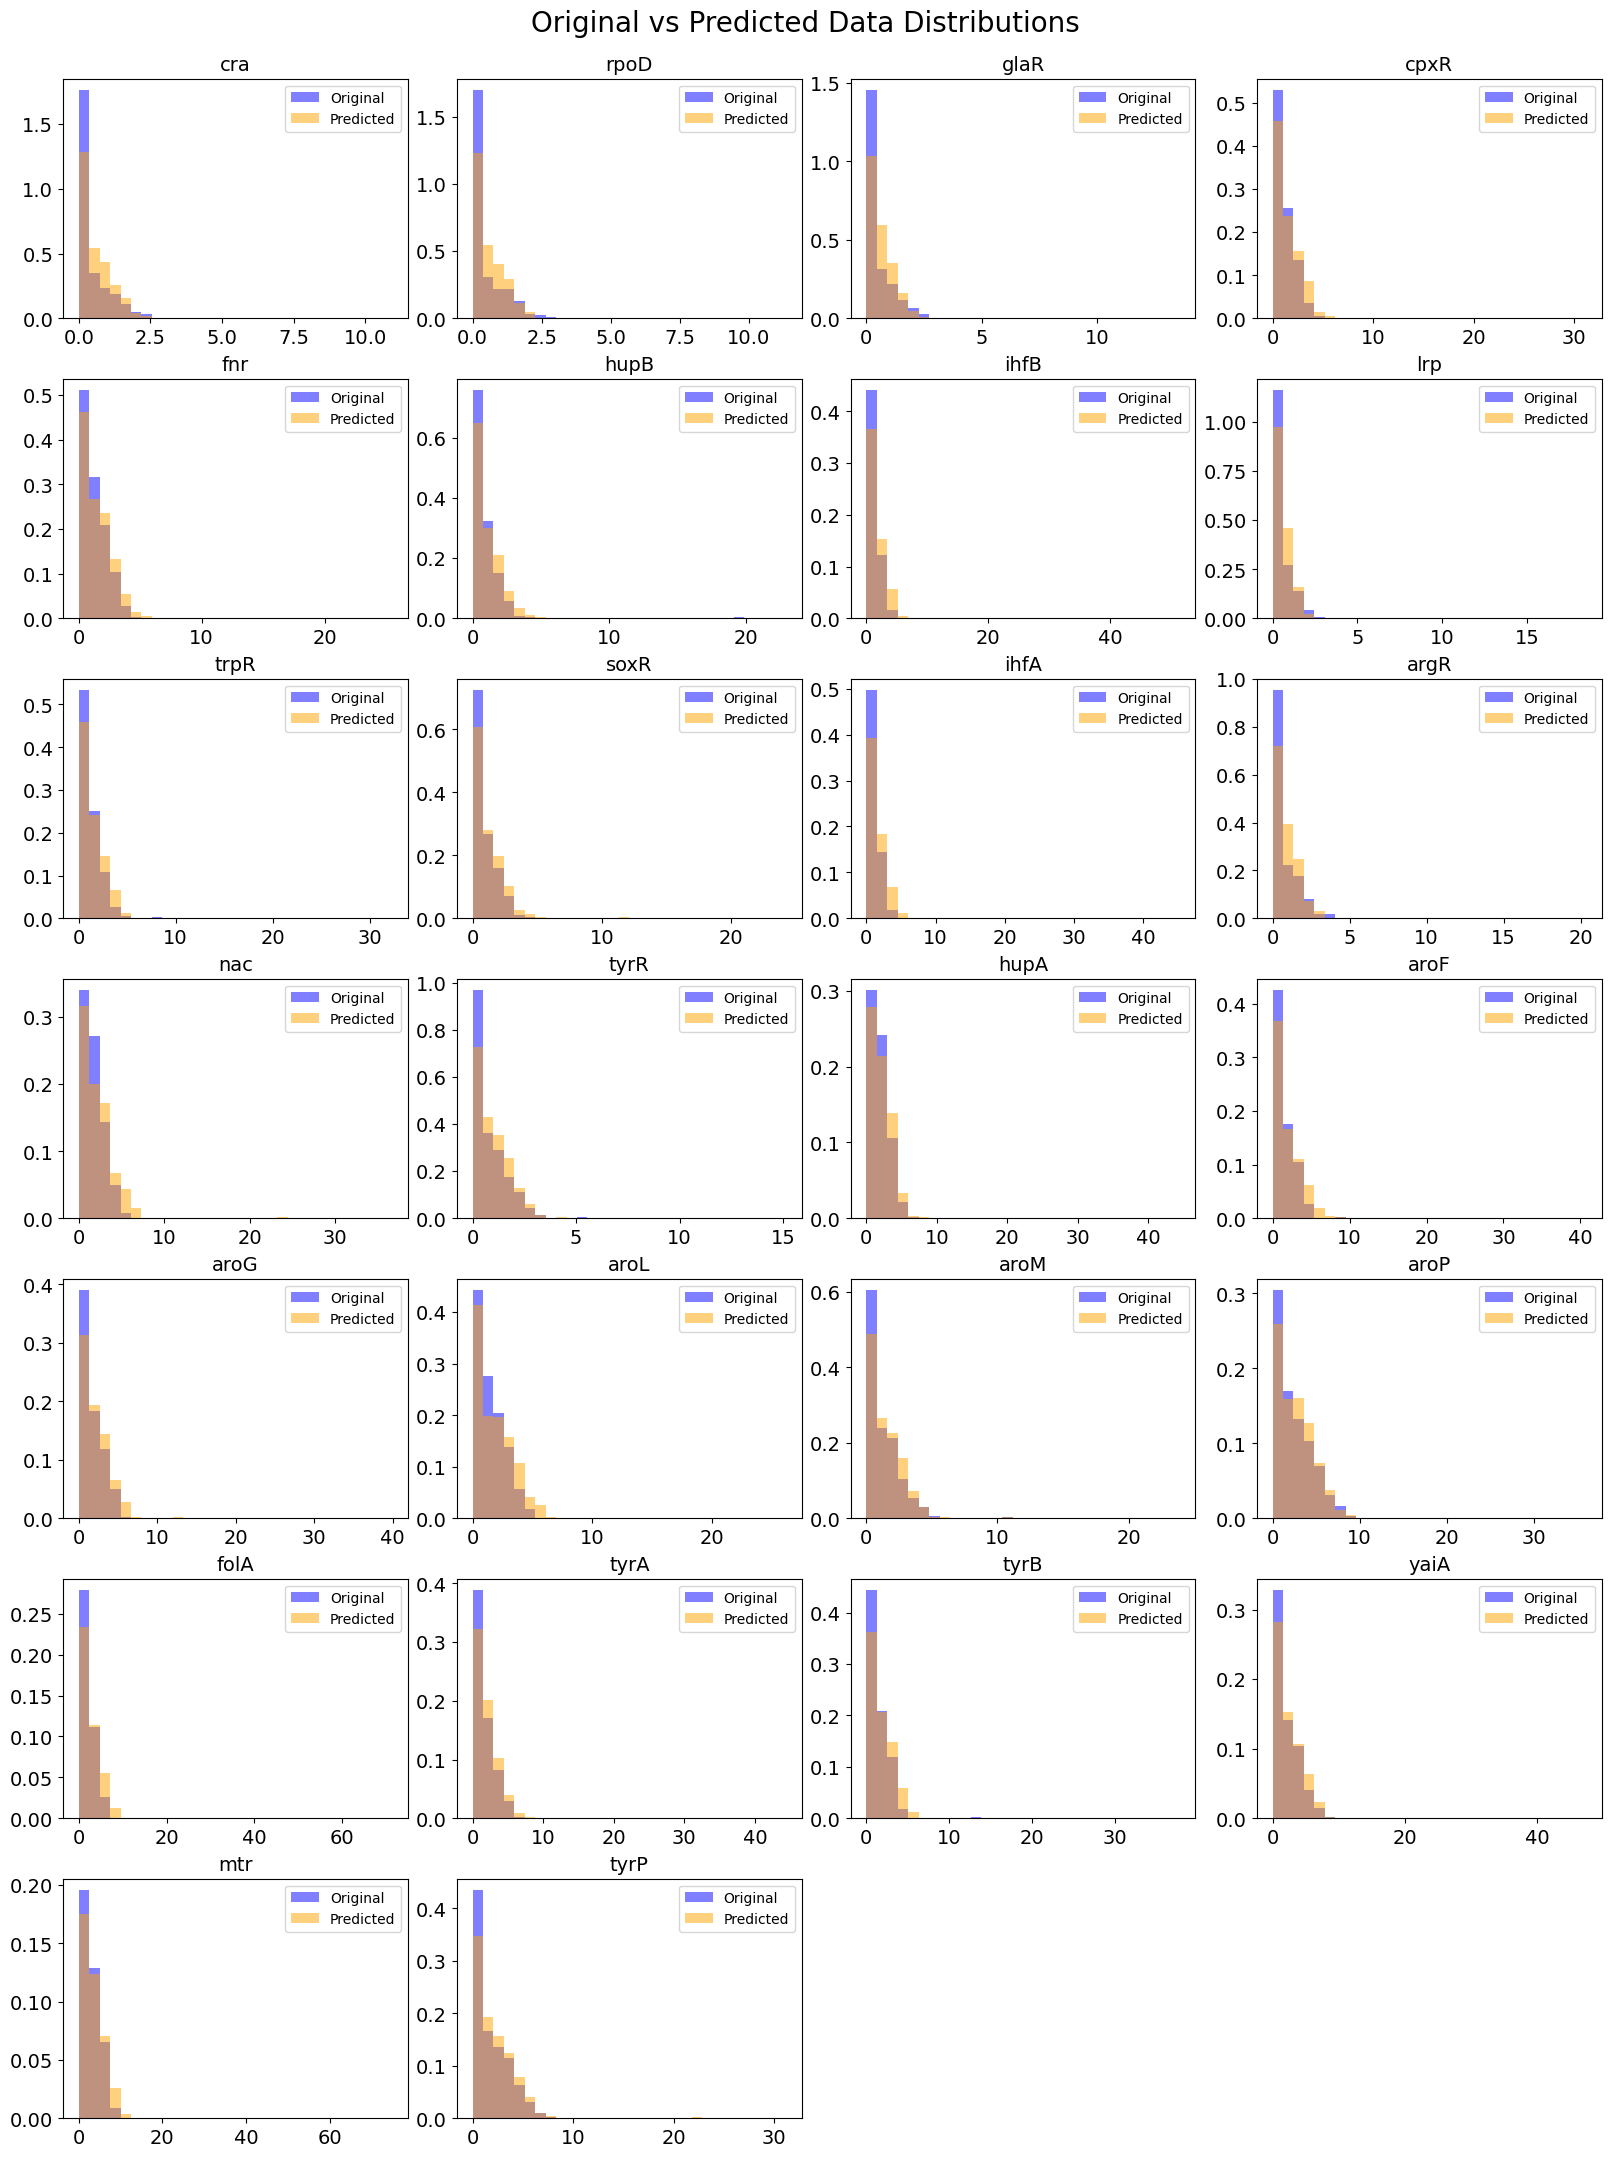

In [7]:
# Plot histograms for each column: original vs predicted data
num_cols = simulated_data_after_calibration.shape[1]
ncols = 4
nrows = int(np.ceil(num_cols / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows), constrained_layout=True)

for idx, col in enumerate(simulated_data.columns):
    ax = axes.flat[idx]
    # Compute combined min/max for consistent bins
    data_min = min(simulated_data[col].min(), simulated_data_after_calibration[col].min())
    data_max = max(simulated_data[col].max(), simulated_data_after_calibration[col].max())
    bins = np.linspace(data_min, data_max, 31)
    ax.hist(simulated_data[col], bins=bins, alpha=0.5, label="Original", color="blue", density=True)
    ax.hist(
        simulated_data_after_calibration[col],
        bins=bins,
        alpha=0.5,
        label="Predicted",
        color="orange",
        density=True,
    )
    ax.set_title(col)
    ax.legend()

# Hide any unused subplots
for j in range(idx + 1, nrows * ncols):
    axes.flat[j].set_visible(False)

fig.suptitle("Original vs Predicted Data Distributions", y=1.02, fontsize=20)
for ax in axes.flat:
    ax.title.set_fontsize(14)
    ax.xaxis.label.set_fontsize(12)
    ax.yaxis.label.set_fontsize(12)
    ax.tick_params(axis="both", labelsize=14)  # Increase tick label font size
    legend = ax.get_legend()
    if legend is not None:
        for text in legend.get_texts():
            text.set_fontsize(10)
plt.show()

# Investigating Intervention Effects
* Average Treatment Effect (ATE): 
    * Genetic activation of gene X has what ATE on gene Y?


In [9]:
ate = nocap.scm.estimate_ate(tyrR_DAG, simulated_data, "tyrR", "tyrA")
display(ate)

0.7425858323550467

# Next Steps:

NOCAP is under active development:
* Analysis of dynamic time series data and interventions
* Causal model discovery and repair
* Robust probabilistic models with noise
* Additional backends

If you are interested in causality for single cell biology, please reach out!
* August George: august.george@pnnl.gov 
* Jeremy Zucker: jeremy.zucker@pnnl.gov 

GitHub: https://github.com/CRISPR-CARB/nocap 



# Thanks

NOCAP Team
* Mridula Gupta
* Yichao Han
* Narmadha Mohankumar
* Jeremy Zucker
* Alex Beliaev

Causality Workshop Team
* Shant Mahserejian
* Sabina Altus
* Caleb Warwick
* Winston Anthony

Funding:
* J.Z. and A.G. were supported in part by award number DE-SC0023091 under the DOE Biosystems Design program.
